<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
!wget https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

--2024-11-09 14:07:10--  https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py.2’

dataset.py.2        100%[===================>]     917  --.-KB/s    in 0s      

2024-11-09 14:07:10 (55.5 MB/s) - ‘dataset.py.2’ saved [917/917]

--2024-11-09 14:07:10--  https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/mas

In [32]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Rescaling , Flatten
from keras import Input
import numpy as np

from dataset import load_hoda

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [3]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [22]:
x_train_original =x_train_original.reshape(-1,5,5)
y_train_original =y_train_original.reshape(-1,5,5)

In [18]:
y_train_original[:3]

array([6, 5, 0], dtype=uint8)

In [ ]:
# Preprocess input data for Keras.
#style 1
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [4]:
# Preprocess input data for Keras.
#style 2
#بدون one hot / dar in halat bayad tuye compile bayad bekhaym azash ke one-hot kone
y_train = y_train_original
y_test = y_test_original

In [20]:
y_train[:3]

array([6, 5, 0], dtype=uint8)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نرمال سازی مقادیر به مقدار بین 0 و 1
</div>

In [5]:

x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

In [23]:
#age normal nakonim data beyne 0 , 1 nistesh
#age normal nakonim tuye khode model shabake bayad behesh ino befahmunim
#az keras Rescale bayad import beshe
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [ ]:
#style 1
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [ ]:
#style 2
model = Sequential()
model.add(keras.Input(shape=(25,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
#style 3
my_layers=[keras.Input(shape=(25,)),
Dense(64, activation='relu'),
Dense(10, activation='softmax')]
model = Sequential(my_layers)


In [6]:
#حالتی که softmax نذاریم
#Dar copmile loss bayad behesh befahmunim softmax nazashtim
#style 3
my_layers=[keras.Input(shape=(25,)),
Dense(64, activation='relu'),
Dense(10)]
model = Sequential(my_layers)


In [28]:
#حالا اگه نرمال هم نکرده باشیم
my_layers=[keras.Input(shape=(25,)),
Rescaling(1/255),
Dense(64, activation='relu'),
Dense(10)]
model = Sequential(my_layers)


In [33]:
#dagighe 23 reshape part
my_layers=[keras.Input(shape=(5,5)),
Rescaling(1/255),
Flatten(),
Dense(64, activation='relu'),
Dense(10)]
model = Sequential(my_layers)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
#در حالتی که بخوایم خودش
#one hot کنه
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
#age softmax nadashte bashim inturi neveshte mishe
#inja tensorflow ro ham import kardim
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [ ]:
1000*0.8

800.0

In [ ]:
import math
math.ceil((800/64))

13

In [36]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.0549 - loss: 2.2950 - val_accuracy: 0.2400 - val_loss: 2.0769
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3120 - loss: 2.0349 - val_accuracy: 0.4800 - val_loss: 1.8997
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5051 - loss: 1.8699 - val_accuracy: 0.6100 - val_loss: 1.7391
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5851 - loss: 1.7248 - val_accuracy: 0.6650 - val_loss: 1.5848
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 1.5659 - val_accuracy: 0.7350 - val_loss: 1.4424
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 1.4100 - val_accuracy: 0.7700 - val_loss: 1.3091
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7311 - loss: 1.3031 - val_accuracy: 0.7700 - val_loss: 1.1981
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7820 - loss: 1.1555 - val_accuracy: 0.7850 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

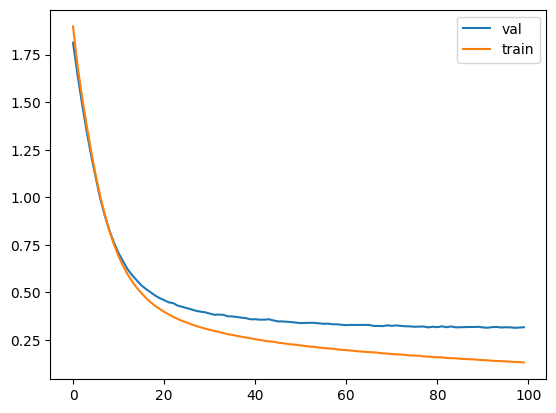

In [14]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

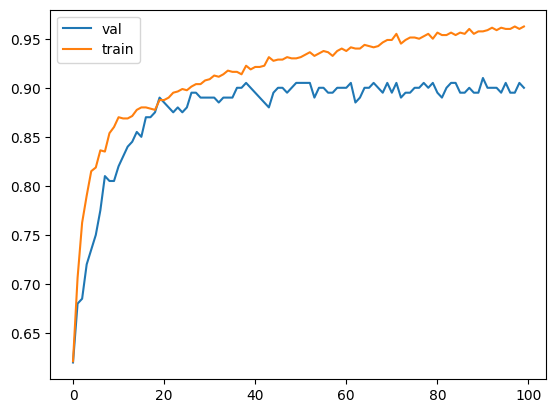

In [15]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [16]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.2527  

Testing loss: 0.27, acc: 0.93%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [17]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [19]:
#Dar halti ke tuye model softmax nazarim braye pishbini bayad intori benevisim
#nn ye subpakage hastesh
tf.nn.softmax(predicted[12])

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.03307565e-03, 1.12458481e-03, 2.44921632e-03, 3.06897040e-04,
       6.28045434e-03, 3.85200977e-03, 1.12047784e-01, 2.31294889e-05,
       8.38968694e-01, 3.09141595e-02], dtype=float32)>

In [ ]:
predicted_classes = np.argmax(predicted, axis=1)

In [ ]:

print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 5 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 4 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 3 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


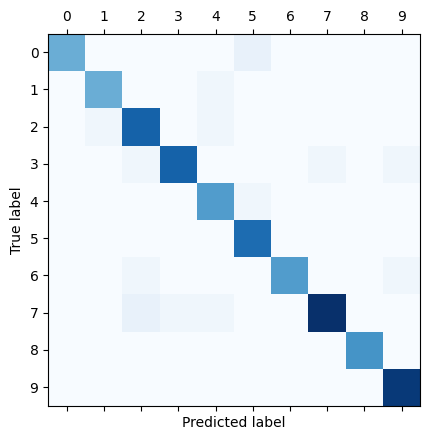

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");